In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import powerlaw as pwl

In [3]:
good_sub = np.array([ 5,  6,  9, 11, 12, 16, 17, 18, 19, 23, 30, 33, 35, 37, 40, 45, 47,
       49, 52, 56, 58, 62, 66, 67, 68, 71, 14, 22, 27, 41, 46, 64])

In [4]:
np.where(good_sub == 58)

(array([20], dtype=int64),)

In [5]:
##  diceva di controllare time scales david poeppel

In [6]:
## il filtro per sua naura cambia le correlazioni? ma allora nella dfa? non capisco.....

###Luca mazzuccato stima i tempi di autocorr dal decadimento esponenziale

In [7]:
cd "../../../Downloads/NewbornEEGData-20220203T094950Z-001/NewbornEEGData/"

C:\Users\Benedetta\Downloads\NewbornEEGData-20220203T094950Z-001\NewbornEEGData


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import powerlaw as pwl

In [9]:
good_sub = np.array([ 5,  6,  9, 11, 12, 16, 17, 18, 19, 23, 30, 33, 35, 37, 40, 45, 47,
       49, 52, 56, 58, 62, 66, 67, 68, 71, 14, 22, 27, 41, 46, 64])

In [10]:
np.insert(np.array([1,2,3]),0,0)

array([0, 1, 2, 3])

## EEg autocorrelations

In [11]:
### COMPARISON BETWEEN SILENCE1 AND SILENCE2

import os
import numpy as np
import scipy.signal as ss
import scipy.io
#from dfa_functions import *
ch_names = ['F7', 'F3', 'Fz', 'F4', 'F8', 'T7', 'C3', 'Cz', 'C4', 'T8']
ch_names = np.array(ch_names)
subjs  = [5,6,9,11,12,13,16,17,18,19,21,23,24,25,30,33,34,35,37,39,40,45,47,49,52,53,56,57,58,60,62,63,65,66,67,68,69,71,14,20,22,27,28,29,31,41,46,64,70]
## you can discard subjec t 23 and 24

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.io import loadmat
from scipy.signal import welch
import pandas as pd
import mne


ch_names = np.array(ch_names)
sfreq = 500
info = mne.create_info(ch_names = list(ch_names),
                       ch_types = 'eeg',
                       sfreq = sfreq)
def find_bad_channels(data, MAX_PEAK=200, MAX_PEAK_SIGMA=15, MAX_DIST_PS=4.5e-3, OFFSET=30, fmin=1, fmax=100, 
                      verbose = True):
    idx_down, idx_up = 0, data.shape[1]
    ss = np.std(data)
    
    psds, freqs = mne.time_frequency.psd_welch(mne.io.RawArray(data/1e6, info, verbose=False), fmin=fmin, fmax=fmax, n_fft=2048, n_overlap=1024/2, verbose=False)
    psds = np.log10(psds)
    
    dist = [((tmp-psds.mean(axis=0))**2).sum() for tmp in psds]
    dist = np.array(dist) / (psds**2).sum() * 1e2
    
    rej = []
    for i, ch in enumerate(ch_names):
        delta = np.abs(data[i]).max()
    
        str_rej = str()

        if delta>MAX_PEAK or dist[i]>MAX_DIST_PS:
            rej.append(ch)
            str_rej = '-> rejected'
            str_rej += ' ('
            if delta>MAX_PEAK:
                str_rej += ' peak'
                idx = np.where(np.abs(data[i])>MAX_PEAK)[0]
            
            if dist[i]>MAX_DIST_PS:
                str_rej += ' ps'
            str_rej += ')'
            
        if verbose: print(f'* {ch}: max peak = {np.round(delta, 2)} mV ({np.round(delta/ss, 2)} std); dist ps = {np.round(dist[i],3)} '+str_rej)
        
        if delta>MAX_PEAK:
            if np.max(idx)/sfreq<OFFSET:
                idx_down = np.max([np.max(idx),idx_down])
                if verbose: print(f'[*] WARNING: Peak only in the initial part - time: {np.max(idx)/sfreq} s')
            if np.min(idx)/sfreq>180-OFFSET:
                idx_up = np.min([np.min(idx),idx_up])
                if verbose: print(f'[*] WARNING: Peak only in the last part - time: {np.min(idx)/sfreq} s')
    if verbose: print('\nBad channels:', rej, '\n')
    return rej, idx_down, idx_up

In [15]:
import os
os.mkdir("../../../Desktop/Criticality in barrel cortex/Data-mat")

In [16]:
os.mkdir("../../../Desktop/Criticality in barrel cortex/Data-mat-theta")

In [23]:
os.mkdir("../../../Desktop/Criticality in barrel cortex/Data-mat-delta")

In [12]:
##  diceva di controllare time scales david poeppel

In [17]:
from scipy.io import savemat
import numpy as np
#a = np.arange(20)
#mdic = {"a": a, "label": "experiment"}
#mdic
#[{'a': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
 #   17, 18, 19]),
#'label': 'experiment'}
#savemat("matlab_matrix.mat", mdic)

In [21]:

for i, subj in enumerate(subjs):
    #print(f'\n\n########## SUBJ {subj} ({i+1}/{len(subjs)})##########')
    s1 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence1 (continuous).mat')
    s2 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence2 (continuous).mat')
    data = s1['eeg_rest'].astype('float')
    rej, idx_down, idx_up = find_bad_channels(data, verbose = False)
    if idx_down > 0 or idx_up < data.shape[1]:
        if idx_down > 0:
            idx_down +=1
        if idx_up < data.shape[1]:
            idx_up -= 1
        data = data[:,idx_down:idx_up]
        rej, idx_down, idx_up = find_bad_channels(data, verbose = False)
    idx_accepted = np.sort([np.where(ch_names == i)[0][0] for i in list(set(ch_names) - set(rej))])
    data = data[list(idx_accepted), idx_down:idx_up][:, :] #try
    nchan = data.shape[0]

    data2 = s2['eeg_rest'].astype('float')
    rej, idx_down, idx_up = find_bad_channels(data2, verbose = False)
    if idx_down > 0 or idx_up < data2.shape[1]:
        if idx_down > 0:
            idx_down +=1
        if idx_up < data2.shape[1]:
            idx_up -= 1
        data2 = data2[:,idx_down:idx_up]
        rej, idx_down, idx_up = find_bad_channels(data2, verbose = False)
    idx_accepted = np.sort([np.where(ch_names == i)[0][0] for i in list(set(ch_names) - set(rej))])
    data2 = data2[list(idx_accepted), idx_down:idx_up][:, :] #try
    nchan2 = data2.shape[0]
    if nchan >= 5 and nchan2 >=5 and subj != 53:
        print(data.shape, data2.shape)
        
        #a = np.arange(20)
        mdic = {"eeg_data": data}
        savemat("../../../Desktop/Criticality in barrel cortex/Data-mat/Data_silence1_sub{}.mat".format(subj), mdic)
        mdic = {"eeg_data": data2}
        savemat("../../../Desktop/Criticality in barrel cortex/Data-mat/Data_silence2_sub{}.mat".format(subj), mdic)

(7, 88117) (10, 86680)
(10, 90118) (10, 94158)
(9, 90135) (10, 94597)
(10, 90136) (10, 94870)
(10, 80601) (7, 94729)
(9, 90160) (10, 94660)
(10, 78452) (10, 88623)
(8, 90137) (9, 93546)
(9, 90139) (10, 94638)
(8, 90133) (10, 94565)
(10, 90144) (8, 94721)
(7, 90123) (9, 97061)
(9, 90177) (10, 94016)
(10, 79379) (10, 94172)
(6, 90165) (8, 94242)
(9, 80227) (9, 94883)
(9, 90131) (7, 87559)
(10, 90160) (8, 100671)
(10, 90143) (10, 102337)
(10, 90129) (9, 94549)
(10, 90125) (9, 94764)
(7, 90144) (9, 78398)
(10, 76969) (10, 96259)
(10, 90139) (9, 95727)
(8, 75840) (9, 90569)
(6, 90147) (10, 71463)
(5, 90111) (10, 93732)
(8, 90153) (8, 93972)
(7, 90134) (9, 93765)
(10, 90117) (9, 95061)
(8, 78031) (10, 105333)
(9, 90135) (10, 90967)


In [22]:

bands = [[1,3],[4,8]]
band = 1
nn= int((2/bands[band][0])*500)
low = bands[band][0]
high = bands[band][1]
filt = True
aa = 1
bb =ss.firwin(nn,[low,high],pass_zero = False, fs = 500)

for i, subj in enumerate(subjs):
    #print(f'\n\n########## SUBJ {subj} ({i+1}/{len(subjs)})##########')
    s1 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence1 (continuous).mat')
    s2 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence2 (continuous).mat')
    data = s1['eeg_rest'].astype('float')
    rej, idx_down, idx_up = find_bad_channels(data, verbose = False)
    if idx_down > 0 or idx_up < data.shape[1]:
        if idx_down > 0:
            idx_down +=1
        if idx_up < data.shape[1]:
            idx_up -= 1
        data = data[:,idx_down:idx_up]
        rej, idx_down, idx_up = find_bad_channels(data, verbose = False)
    idx_accepted = np.sort([np.where(ch_names == i)[0][0] for i in list(set(ch_names) - set(rej))])
    data = data[list(idx_accepted), idx_down:idx_up][:, :] #try
    nchan = data.shape[0]

    data2 = s2['eeg_rest'].astype('float')
    rej, idx_down, idx_up = find_bad_channels(data2, verbose = False)
    if idx_down > 0 or idx_up < data2.shape[1]:
        if idx_down > 0:
            idx_down +=1
        if idx_up < data2.shape[1]:
            idx_up -= 1
        data2 = data2[:,idx_down:idx_up]
        rej, idx_down, idx_up = find_bad_channels(data2, verbose = False)
    idx_accepted = np.sort([np.where(ch_names == i)[0][0] for i in list(set(ch_names) - set(rej))])
    data2 = data2[list(idx_accepted), idx_down:idx_up][:, :] #try
    nchan2 = data2.shape[0]
    #print(data.shape, data2.shape)
    if nchan >= 5 and nchan2 >=5 and subj != 53:

        #a = np.arange(20)

        filtered = ss.filtfilt(bb,aa,data,axis =1, padlen = 500)
        mdic = {"eeg_data": filtered}
        print(filtered.shape)
        savemat("../../../Desktop/Criticality in barrel cortex/Data-mat-theta/Data_silence1_sub{}.mat".format(subj), mdic)
        mdic = {"eeg_data": filtered}
        
        filtered = ss.filtfilt(bb,aa,data2,axis =1, padlen = 500)
        print(filtered.shape)
        mdic = {"eeg_data": filtered}
        savemat("../../../Desktop/Criticality in barrel cortex/Data-mat-theta/Data_silence2_sub{}.mat".format(subj), mdic)


(7, 88117) (10, 86680)
(7, 88117)
(10, 86680)
(10, 90118) (10, 94158)
(10, 90118)
(10, 94158)
(9, 90135) (10, 94597)
(9, 90135)
(10, 94597)
(10, 90136) (10, 94870)
(10, 90136)
(10, 94870)
(10, 80601) (7, 94729)
(10, 80601)
(7, 94729)
(0, 90144) (8, 78075)
(9, 90160) (10, 94660)
(9, 90160)
(10, 94660)
(10, 78452) (10, 88623)
(10, 78452)
(10, 88623)
(8, 90137) (9, 93546)
(8, 90137)
(9, 93546)
(9, 90139) (10, 94638)
(9, 90139)
(10, 94638)
(9, 90142) (1, 94318)
(8, 90133) (10, 94565)
(8, 90133)
(10, 94565)
(0, 66811) (10, 92369)
(2, 90162) (10, 78075)
(10, 90144) (8, 94721)
(10, 90144)
(8, 94721)
(7, 90123) (9, 97061)
(7, 90123)
(9, 97061)
(0, 90125) (10, 78923)
(9, 90177) (10, 94016)
(9, 90177)
(10, 94016)
(10, 79379) (10, 94172)
(10, 79379)
(10, 94172)
(4, 90161) (9, 95146)
(6, 90165) (8, 94242)
(6, 90165)
(8, 94242)
(9, 80227) (9, 94883)
(9, 80227)
(9, 94883)
(9, 90131) (7, 87559)
(9, 90131)
(7, 87559)
(10, 90160) (8, 100671)
(10, 90160)
(8, 100671)
(10, 90143) (10, 102337)
(10, 90143)


In [25]:
o = 0
bands = [[1,3],[4,8]]
band = 0
nn= int((2/bands[band][0])*500)
low = bands[band][0]
high = bands[band][1]
filt = True
aa = 1
bb =ss.firwin(nn,[low,high],pass_zero = False, fs = 500)

for i, subj in enumerate(subjs):
    #print(f'\n\n########## SUBJ {subj} ({i+1}/{len(subjs)})##########')
    s1 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence1 (continuous).mat')
    s2 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence2 (continuous).mat')
    data = s1['eeg_rest'].astype('float')
    rej, idx_down, idx_up = find_bad_channels(data, verbose = False)
    if idx_down > 0 or idx_up < data.shape[1]:
        if idx_down > 0:
            idx_down +=1
        if idx_up < data.shape[1]:
            idx_up -= 1
        data = data[:,idx_down:idx_up]
        rej, idx_down, idx_up = find_bad_channels(data, verbose = False)
    idx_accepted = np.sort([np.where(ch_names == i)[0][0] for i in list(set(ch_names) - set(rej))])
    data = data[list(idx_accepted), idx_down:idx_up][:, :] #try
    nchan = data.shape[0]

    data2 = s2['eeg_rest'].astype('float')
    rej, idx_down, idx_up = find_bad_channels(data2, verbose = False)
    if idx_down > 0 or idx_up < data2.shape[1]:
        if idx_down > 0:
            idx_down +=1
        if idx_up < data2.shape[1]:
            idx_up -= 1
        data2 = data2[:,idx_down:idx_up]
        rej, idx_down, idx_up = find_bad_channels(data2, verbose = False)
    idx_accepted = np.sort([np.where(ch_names == i)[0][0] for i in list(set(ch_names) - set(rej))])
    data2 = data2[list(idx_accepted), idx_down:idx_up][:, :] #try
    nchan2 = data2.shape[0]
    #print(data.shape, data2.shape)
    if nchan >= 5 and nchan2 >=5 and subj != 53:

        #a = np.arange(20)

        filtered = ss.filtfilt(bb,aa,data,axis =1, padlen = 500)
        mdic = {"eeg_data": filtered}
        #print(filtered.shape)
        savemat("../../../Desktop/Criticality in barrel cortex/Data-mat-delta/Data_silence1_sub{}.mat".format(subj), mdic)
        mdic = {"eeg_data": filtered}
        
        filtered = ss.filtfilt(bb,aa,data2,axis =1, padlen = 500)
        #print(filtered.shape)
        mdic = {"eeg_data": filtered}
        savemat(c, mdic)
        o += 1
print(o)

32


In [64]:
s1 = loadmat("../../../Desktop/Criticality in barrel cortex/Data-mat/Data_silence1_sub{}.mat".format(5))
#data = s1['eeg_rest'].astype('float')

In [125]:
eeg_data = s1['eeg_data']

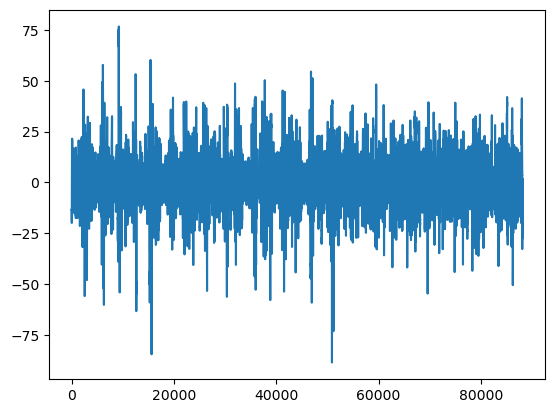

In [108]:
import random
plt.plot(eeg_data)

In [134]:

## add shuffle also to my data
ph.shape

(88117, 7)

(7, 88117)


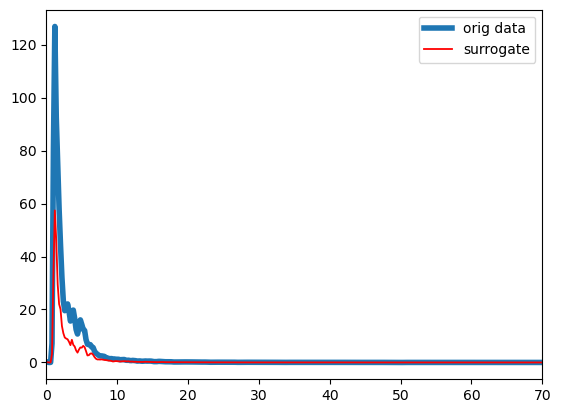

In [135]:
import random
import numpy as np
from scipy import signal
f = np.fft.fft(eeg_data, axis = 1)
ab = np.abs(f)
ph = np.angle(f).T
old_ph = ph[:].T
np.random.shuffle(ph)
new_ph = ph.T
#ph = np.array([np.random.uniform(0,1)*2*np.pi for i in range(len(ph))])
Xsurr = ab*(np.exp(1j*new_ph))
#print(Xsurr.shape)
xsurr = np.real(np.fft.ifft(Xsurr,axis = 1),)


x,p = signal.welch(eeg_data[0], fs = fs, nperseg = fs*5)
plt.plot(x,p, lw = '4', label = 'orig data')

x,p = signal.welch(xsurr[0], fs = fs, nperseg = fs*5,)
plt.plot(x,p,color = 'red',label = 'surrogate', lw = 1.3)
plt.xlim(0,70)
plt.legend()

print(xsurr.shape)
#plt.yscale('log')
#print(xsurr.shape)
#plt.xlim(0.1,30)
#plt.ylim(10**-2,10**3)

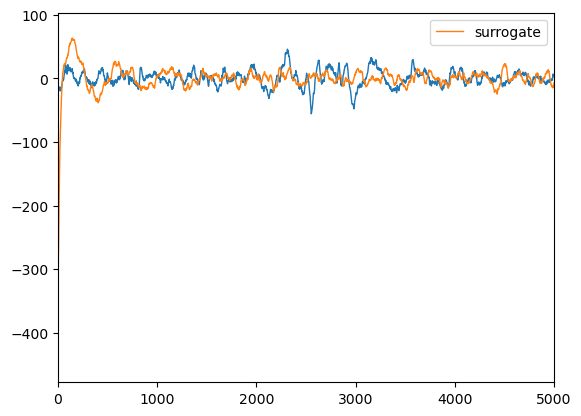

In [136]:
plt.plot(eeg_data[0], lw = 1)
#plt.xlim(0,500*3)
plt.plot(xsurr[0], lw = 1, label ='surrogate')
plt.legend()
plt.xlim(0,500*10);
## we have something at the borders...


In [138]:
np.array_equal(ab*np.exp(1j*old_ph), ab*np.exp(1j*new_ph))

True

In [139]:
eeg_data.shape

(7, 88117)

In [143]:

f = np.fft.fft(eeg_data[0])
ab = np.abs(f)
ph = np.angle(f)
old_ph = ph[:]
random.shuffle(ph)

new_ph  =ph

In [144]:
np.array_equal(ab*np.exp(1j*old_ph), ab*np.exp(1j*new_ph))

True

In [151]:
old_ph.shape, ph.shape

((88117,), (88117,))

In [160]:
arr = np.array([3,4,4,1,2,3,4,])
old = arr.copy()
np.random.shuffle(arr)
arr

array([1, 4, 2, 3, 4, 3, 4])

In [161]:
np.array_equal(old,arr)

False

(0.0, 2000.0)

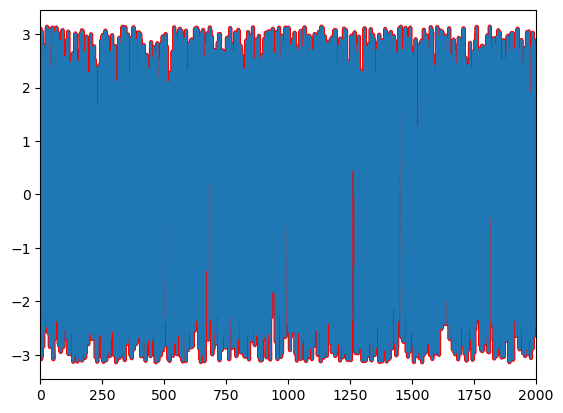

In [149]:
plt.plot(old_ph, color ='red', lw =3)
plt.plot(new_ph)
plt.xlim(0,2000)